In [1]:
import math
from decimal import *
import numpy as np # linear algebra
import pandas as pd # read_csv and such
import matplotlib.pyplot as plt # plotting and such
from io import StringIO # convert strings to buffers or something like that.

### Get the data and start messing with it
We read the data in. It's rather large so it would be better not to read all of it into memory at once!

In [2]:
# the paths to our flight related data sets
airlines_path = '../data/flight_delays_2015/airlines.csv'
airports_path = '../data/flight_delays_2015/airports.csv'
flights_path  = '../data/flight_delays_2015/flights.csv'
# weather related paths
weather_path = '../data/weather/2015.csv'

# read the airlines in and get a dataframe containing the dataset
# Set low_memory to False so that types can be inferred/converted
airlines_df = pd.read_csv(airlines_path, low_memory=False) 
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [3]:
airports_df = pd.read_csv(airports_path, low_memory=False)
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
flights_df = pd.read_csv(flights_path, low_memory=False)
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### We have to do some cleaning of the dataset
You can see that some of the data points in the flights dataset come in as NaN.
This is because the CSV file contains some points of data which are `''`.
We will have to process these as a 0 when doing maths on the delay times.

### Types of delays
Each flight's total delay time is a summation of the columns;
`AIR_SYSTEM_DELAY`, `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY`, `WEATHER_DELAY`

# Let's plot some data
---
Let's see which airlines have the highest total departure delay time, with a barplot!
We see in the data that some of the departure delay times have negative values. This means that the 
flight actually departed earlier than scheduled. From an inital glossing over of the data we can 
see that the time granualrity is measured in minutes.

In [5]:
headers = ['AIRLINE', 'DEPARTURE_DELAY']
airline_delays_df = pd.read_csv(flights_path, usecols=headers, low_memory=False)
airline_delays_df.head()

,AIRLINE,DEPARTURE_DELAY
0,AS,-11.0
1,AA,-8.0
2,US,-2.0
3,AA,-5.0
4,AS,-1.0


So, we can grab the columns that we want to plot by. So, let's create a plot.

In [6]:
delay_sums = {} # airline : total delay time
flight_counts = {}
for a in airlines_df['IATA_CODE']:
    delay_sums[a] = Decimal(0)
    flight_counts[a] = 0

Now we iterate the flights dataset, each time summing the delay time into our dictionary of IATA_CODEs

In [7]:
i = 0
for a in airline_delays_df['AIRLINE']:
    delay = airline_delays_df['DEPARTURE_DELAY'][i]
    if math.isnan(delay): 
        delay = 0
    delay_sums[a] = Decimal(delay_sums[a]) + Decimal(delay)
    flight_counts[a] += 1
    i = i + 1

### Wow, that's a lot of time!
We should probably make sure to choose a less granular scale when
plotting the data, such as days, or maybe even... **YEARS**!

In [8]:
delay_sums

{'AA': Decimal('6369435'),
 'AS': Decimal('306997'),
 'B6': Decimal('3026467'),
 'DL': Decimal('6427294'),
 'EV': Decimal('4857338'),
 'F9': Decimal('1205449'),
 'HA': Decimal('36972'),
 'MQ': Decimal('2837908'),
 'NK': Decimal('1840887'),
 'OO': Decimal('4517510'),
 'UA': Decimal('7355348'),
 'US': Decimal('1196447'),
 'VX': Decimal('553852'),
 'WN': Decimal('13186520')}

In [9]:
# convert the times into years
delay_sums_years = {}
min_in_year = 525600
for a in delay_sums:
    delay_sums_years[a] = round(delay_sums[a] / min_in_year, 2)
delay_sums_years

{'AA': 12.12,
 'AS': 0.58,
 'B6': 5.76,
 'DL': 12.23,
 'EV': 9.24,
 'F9': 2.29,
 'HA': 0.07,
 'MQ': 5.4,
 'NK': 3.5,
 'OO': 8.59,
 'UA': 13.99,
 'US': 2.28,
 'VX': 1.05,
 'WN': 25.09}

<type 'numpy.ndarray'>


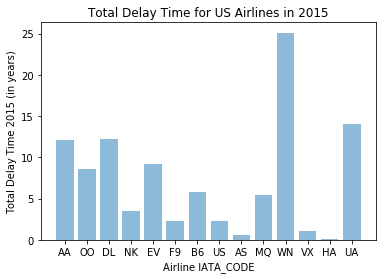

In [10]:
# start creating the plot from the delay_sums_years dictionary
objects = delay_sums_years.keys()
y_pos = np.arange(len(objects))
print(type(y_pos))
performance = list(delay_sums_years.values())

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Delay Time 2015 (in years)')
plt.xlabel('Airline IATA_CODE')
plt.title('Total Delay Time for US Airlines in 2015')

plt.show()

### That's a pretty nice plot, but...
We likely need to consider this within the context of volume of flights.
This plot might tell us which airlines are used more, simply because the most used airline would likely have the highest delay summation, but to be certain we need to compare with percentage of flights that belong to each airline. Then we can build a better initial idea of which airlines simply have more delays, in terms of time and volume.

In [11]:
# Find the average flight delay for each airline.
delay_avg = {}
for a in delay_sums:
    delay_avg[a] = delay_sums[a] / flight_counts[a]
delay_avg

{'AA': Decimal('8.773519802089302243575615992'),
 'AS': Decimal('1.779476121747497406112879012'),
 'B6': Decimal('11.33304499565621161738713639'),
 'DL': Decimal('7.338090448359994108788750983'),
 'EV': Decimal('8.492191119572989823017359090'),
 'F9': Decimal('13.27060856928970892597648509'),
 'HA': Decimal('0.4847388294524858401510383889'),
 'MQ': Decimal('9.632042683754649868310298949'),
 'NK': Decimal('15.68327383944317126572896344'),
 'OO': Decimal('7.678230586059729448137427701'),
 'UA': Decimal('14.26220664969373093695646694'),
 'US': Decimal('6.020919407191203482374254586'),
 'VX': Decimal('8.947094648078445309597273153'),
 'WN': Decimal('10.45010718347195200716405609')}

<type 'numpy.ndarray'>


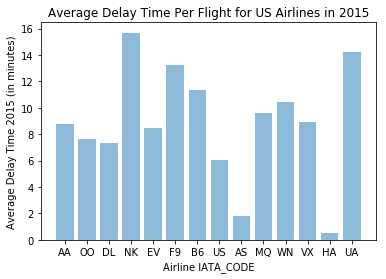

In [12]:
# start creating the plot from the delay_avg dictionary
objects = delay_avg.keys()
y_pos = np.arange(len(objects))
print(type(y_pos))
performance = list(delay_avg.values())

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Delay Time 2015 (in minutes)')
plt.xlabel('Airline IATA_CODE')
plt.title('Average Delay Time Per Flight for US Airlines in 2015')

plt.show()

### This plot looks better
There appears to be a lot less deviation than the other airlines but Alaskan Airlines and Hawaiian Airlines are still both well below the other airlines.